# **Download Libraries**

I need to download these libraries because i'm using **Virtual Environment** (using **Anaconda**) when i'm working with this project

In [1905]:
#%pip install pandas
#%pip install matplotlib
#%pip install seaborn
#%pip install scikit-learn
#%pip install imbalanced-learn
#!conda list

# **Import Libraries**

Import necessary libraries
- pandas
- numpy
- matplotlib
- os

In [1906]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# **Global Variables**

- *var* **DATASET_PATH** = Path of the dataset used for model training
- *var* **raw_data** = Dataset used for model training
- *var* **SUBSTRING_CHECKER** *(Optional)* = to group by column using regex (useful for anomaly detection)

In [1907]:
DATASET_PATH = os.path.join(os.getcwd(),"./raw_dataset/loan_data_2007_2014.csv")
raw_data = pd.read_csv(DATASET_PATH,index_col=0)
#SUBSTRING_CHECKER = raw_data['url'].str.extract('(lendingclub)', expand=False)

C:\Users\Muhammad Ichsan\AppData\Local\Temp\ipykernel_4360\4144800799.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv(DATASET_PATH,index_col=0)


### Delete Later

# **Business Understanding**

When a borrower comes and ask for a loan to a Lending Company, it's up for the company to either **accept** or **reject** the loan. They decide that based on the borrower's profile. 
- If the borrower's profile is **bad** and the company lended their money to them, it will results in a financial loss for the company
- If the borrower's profile is **good** and the company didn't lend their money to them, it will also results in a financial loss for the company

**TARGET** : Borrower's profile **good**, company **accept** the loan

When a borrower's loan is **accepted** there will be 3 possible scenarios that happen to them
1. **Fully Paid** : Borrower fully paid all the amount they loaned
2. **Current** : Borrower still in their tenure
3. **Charged Off** : Borrower failed to fully paid all the amount they loaned after the **default** period

# **Our Objectives**

Make a Predictive Model to assist lending companies in their decision making to either **accept** or **reject** a loan, in hope to reduce error and increase company profits

# **Data Understanding**
First up, we need to understand the data that we are working with
- Check data values using **Dataframe.head()** function
- Check dataset features overview non-null count and datatype using **Dataframe.info()** function
    - From **Dataframe.info()** we got the information of the data row and column sizes
    - Row     : 466285
    - Column  : 74
- Check dataset statistical description using **Dataframe.describe()**

In [1908]:
raw_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1909]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13  annu

In [1910]:
raw_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,29.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


## Understand Specific Feature

To provide detailed info of each column for us to understand

In [1911]:
raw_data['loan_status'].head()

0     Fully Paid
1    Charged Off
2     Fully Paid
3     Fully Paid
4        Current
Name: loan_status, dtype: object

In [1912]:
raw_data['loan_status'].info()

<class 'pandas.core.series.Series'>
Index: 466285 entries, 0 to 466284
Series name: loan_status
Non-Null Count   Dtype 
--------------   ----- 
466285 non-null  object
dtypes: object(1)
memory usage: 7.1+ MB


## Distribution Checker
### Used for Numerical Column
To provide information of a spesific column's distribution

Text(0.5, 1.0, 'Distribution of Loan Amount')

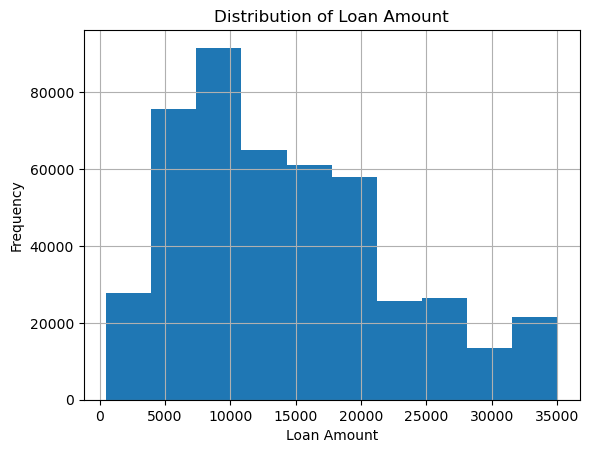

In [1913]:
raw_data['loan_amnt'].hist()
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amount')

## Delete Empty Column

Less convoluted Heatmap

In [1914]:
raw_data = raw_data.drop(['id','member_id','policy_code','annual_inc_joint','dti_joint','verification_status_joint','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','inq_fi','total_cu_tl','inq_last_12m'],axis=1)

# **Define Target**

Based on Business Understanding, Objectives, and Data Understanding, we can conclude the target feature for this model is the **'loan_amount'** 1 for Fully Paid and 0 for Charged Off / Defaulted

# **Exploratory Data Analysis**

## Loan Status Check

Text(0.5, 1.0, 'Loan Status Frequency')

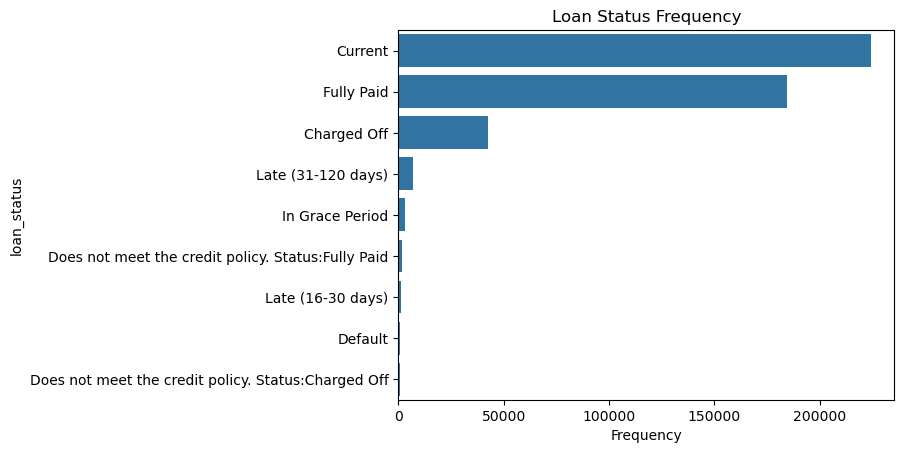

In [1915]:
data = raw_data['loan_status'].value_counts()
index = data.index
frequency = data.values

ax = sns.barplot(x=frequency,y=index,orient='h')
ax.set_xlabel('Frequency')
ax.set_title('Loan Status Frequency')

### Output

We need to turn this feature into a **Binary Categorical** then proceed to do **Binary Encoding**

In [1916]:
map_data = {
    'Charged Off' : 'Default',
    'Fully Paid' : 'Fully Paid',
    'Default' : 'Default',
    'Current' : 'Fully Paid',
    'Late (31-120 days)' : 'Default',
    'In Grace Period' : 'Default',
    'Does not meet the credit policy. Status:Fully Paid' : 'Fully Paid',
    'Late (16-30 days)' : 'Default',
    'Does not meet the credit policy. Status:Charged Off' : 'Default'
}

raw_data['loan_status'] = raw_data['loan_status'].map(map_data)

Text(0.5, 1.0, 'Loan Status Frequency')

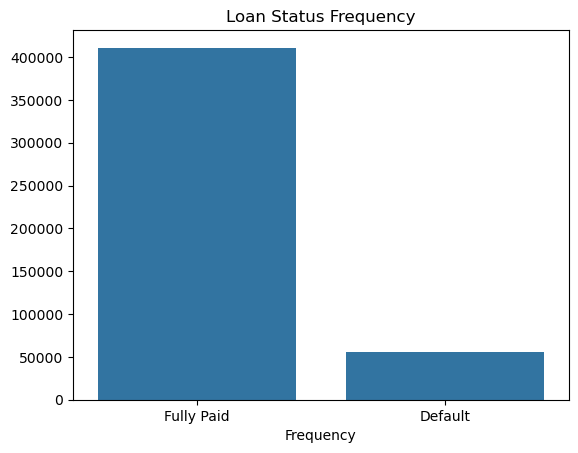

In [1917]:
data = raw_data['loan_status'].value_counts()
index = data.index
frequency = data.values

ax = sns.barplot(x=index,y=frequency,orient='v')
ax.set_xlabel('Frequency')
ax.set_title('Loan Status Frequency')

## Heatmap

To provide information about features correlation across the dataset

<Axes: >

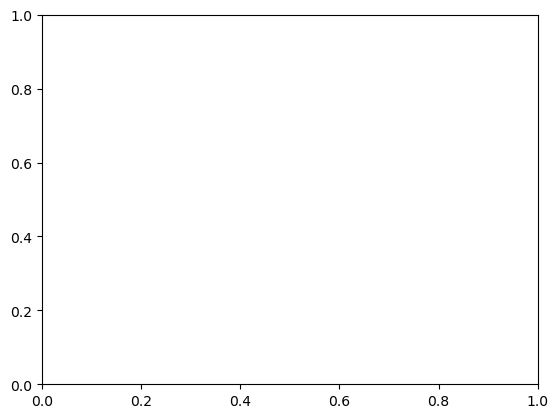

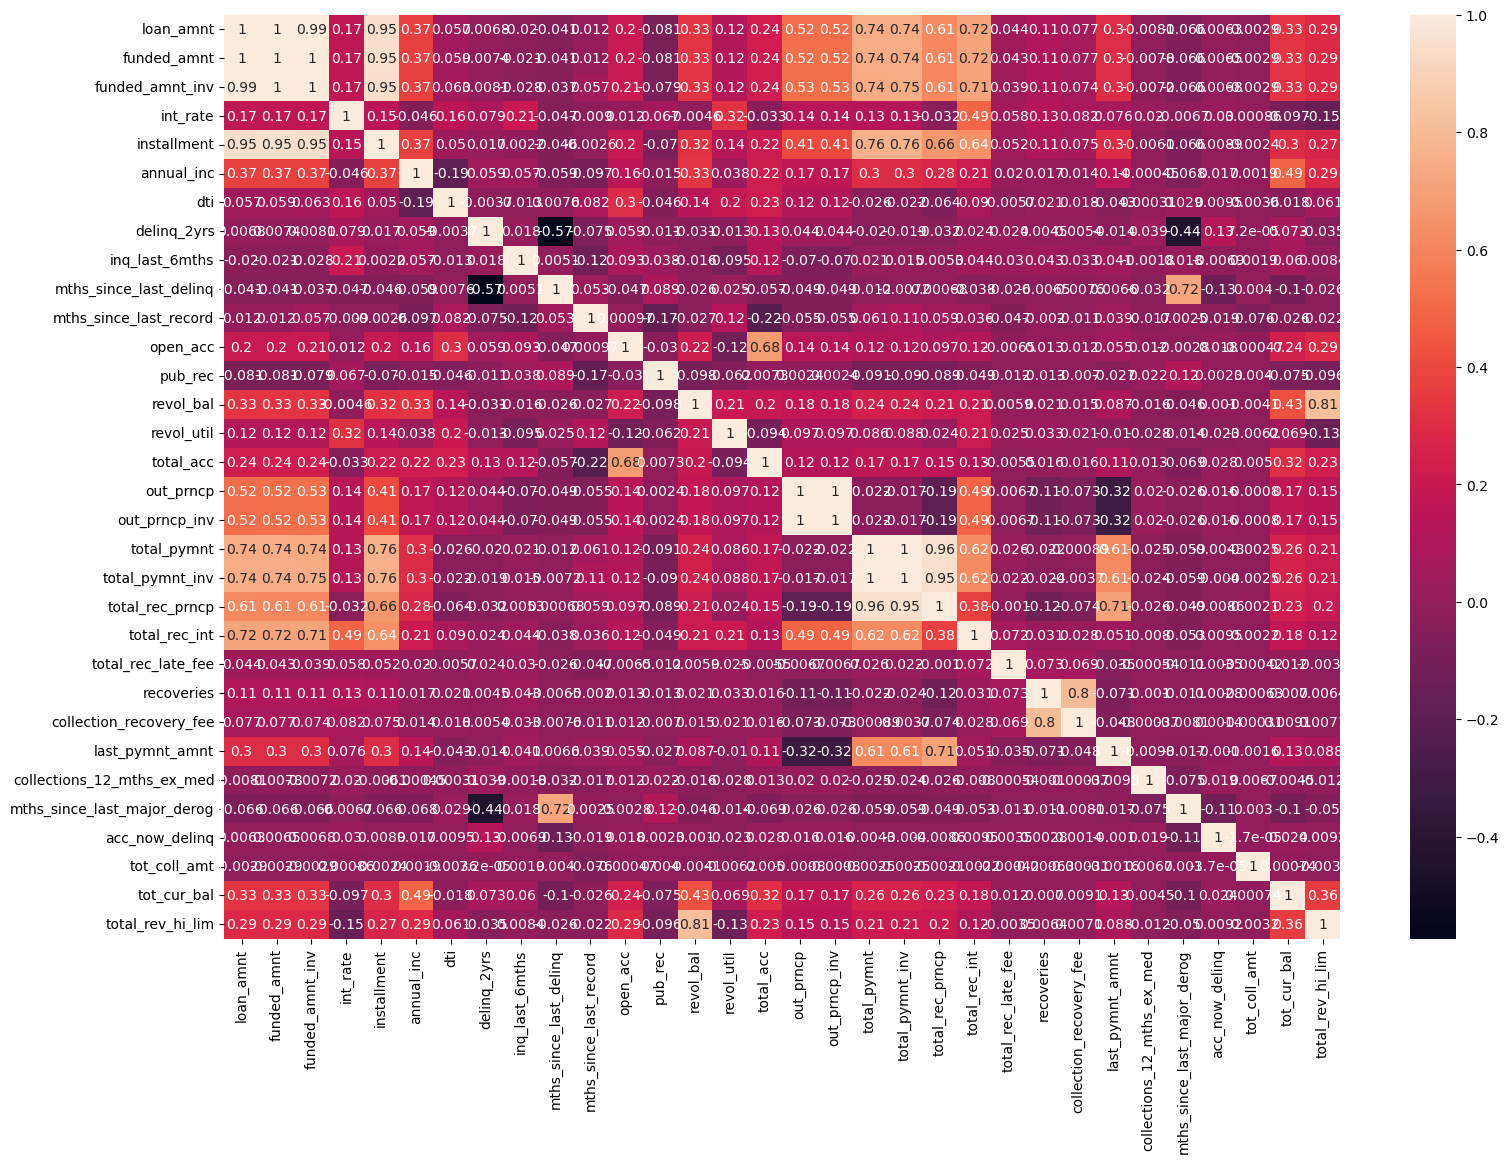

In [1918]:
fig,ax = plt.subplots()
numeric_data = raw_data.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(18,12))
sns.heatmap(numeric_data.corr(),annot=True)

### Investigate Abnormal Correlation

In [1919]:
#ax = sns.barplot(data=raw_data,x='loan_amnt',y='installment')
#ax.set_title('Loan Amount - Installment Correlation')

### Output

- Drop 'funded_amnt_inv' : Redundant with 'funded_amnt'
- Drop 'funded_amnt' : Redundant with 'loan_amnt'
- Drop 'out_prncp_inv' : Redundant with 'out_prncp'
- Drop 'total_pymnt_inv' : Redundant with 'total_pymnt'

In [1920]:
raw_data = raw_data.drop(['funded_amnt_inv','funded_amnt','out_prncp_inv','total_pymnt_inv'],axis=1)

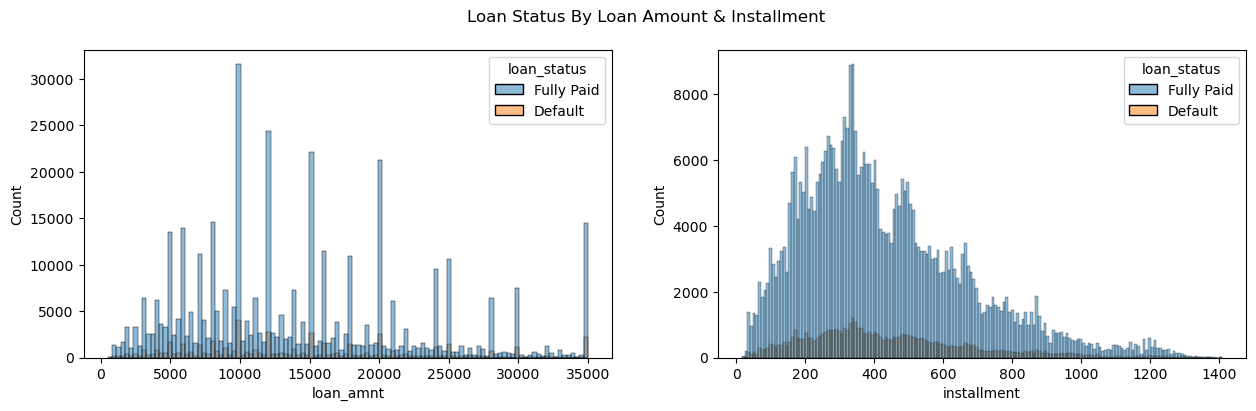

In [1921]:
fig, ax = plt.subplots(figsize=(15,4),nrows=1,ncols=2)
sns.histplot(data=raw_data,x='loan_amnt',hue='loan_status',ax=ax[0])
sns.histplot(data=raw_data,x='installment',hue='loan_status',ax=ax[1])
plt.suptitle('Loan Status By Loan Amount & Installment')
plt.show()

**Insight** : 1. High Loan Amount or Installment doesn't necessarily affect Loan Status

Text(0.5, 1.0, 'Loan Status by Term')

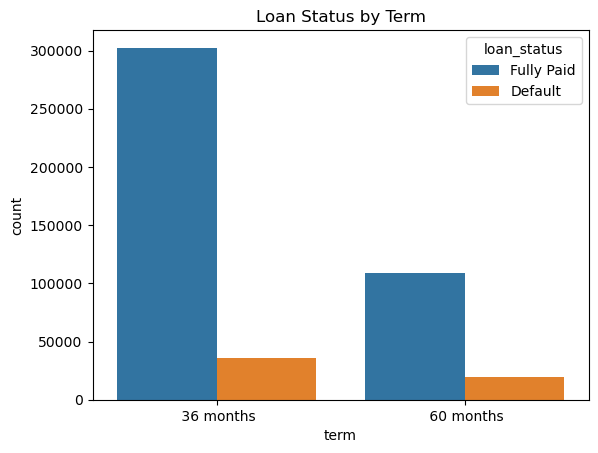

In [1922]:
ax = sns.countplot(data=raw_data,x='term',hue='loan_status')
ax.set_title('Loan Status by Term')

**Insight** : 2. Longer term returns higher ratio of default

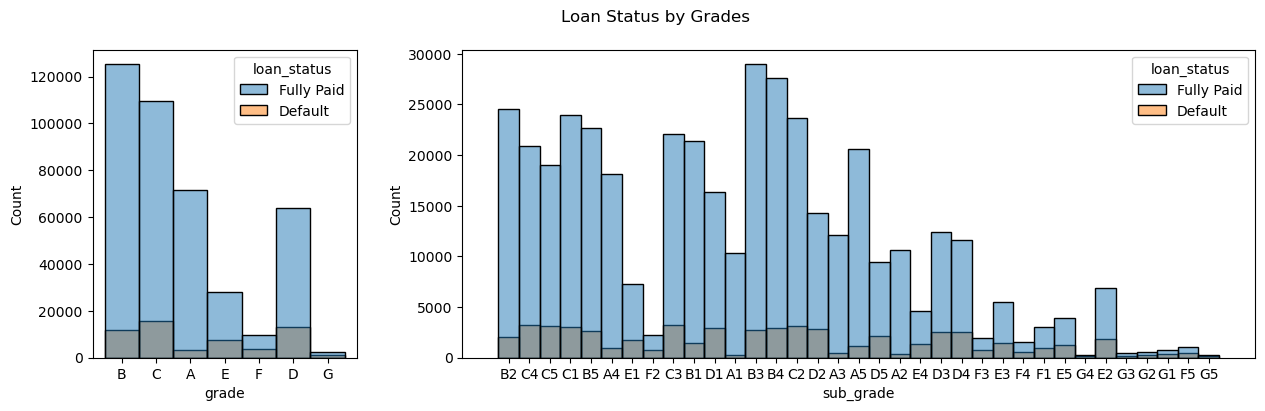

In [1923]:
fig,ax = plt.subplots(figsize=(15,4),nrows=1,ncols=2,gridspec_kw={'width_ratios': [1, 3]})
sns.histplot(data=raw_data,x='grade',hue='loan_status',ax=ax[0])
sns.histplot(data=raw_data,x='sub_grade',hue='loan_status',ax=ax[1])
plt.suptitle('Loan Status by Grades')
plt.show()

**Insight** : 3. Lower Grade in line with higher rate of Default

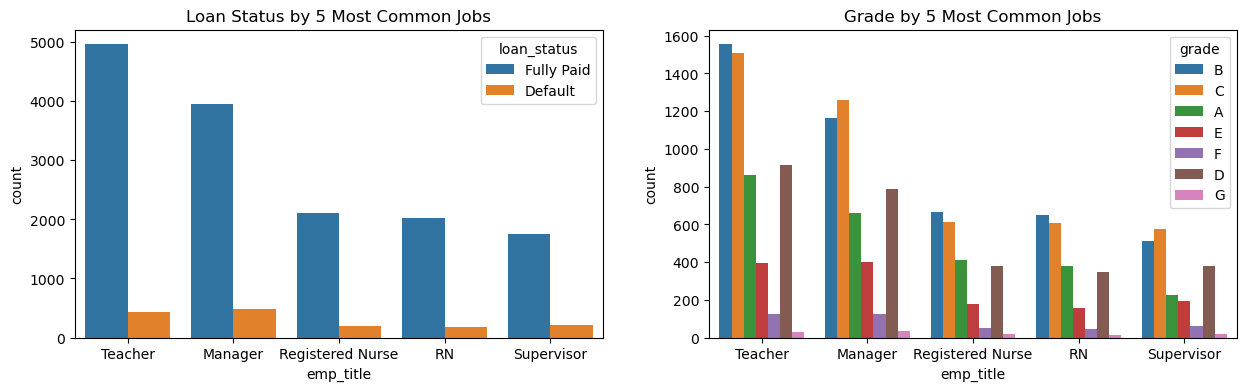

In [1924]:
fig,ax = plt.subplots(figsize=(15,4),nrows=1,ncols=2)

sns.countplot(data=raw_data,x='emp_title',hue='loan_status',ax=ax[0],order=raw_data.emp_title.value_counts().iloc[:5].index)
sns.countplot(data=raw_data,x='emp_title',hue='grade',ax=ax[1],order=raw_data.emp_title.value_counts().iloc[:5].index)
ax[0].set_title('Loan Status by 5 Most Common Jobs')
ax[1].set_title('Grade by 5 Most Common Jobs')
plt.show()

**Insight** : 4. Loan Status and Grade evenly spread across 5 most common jobs

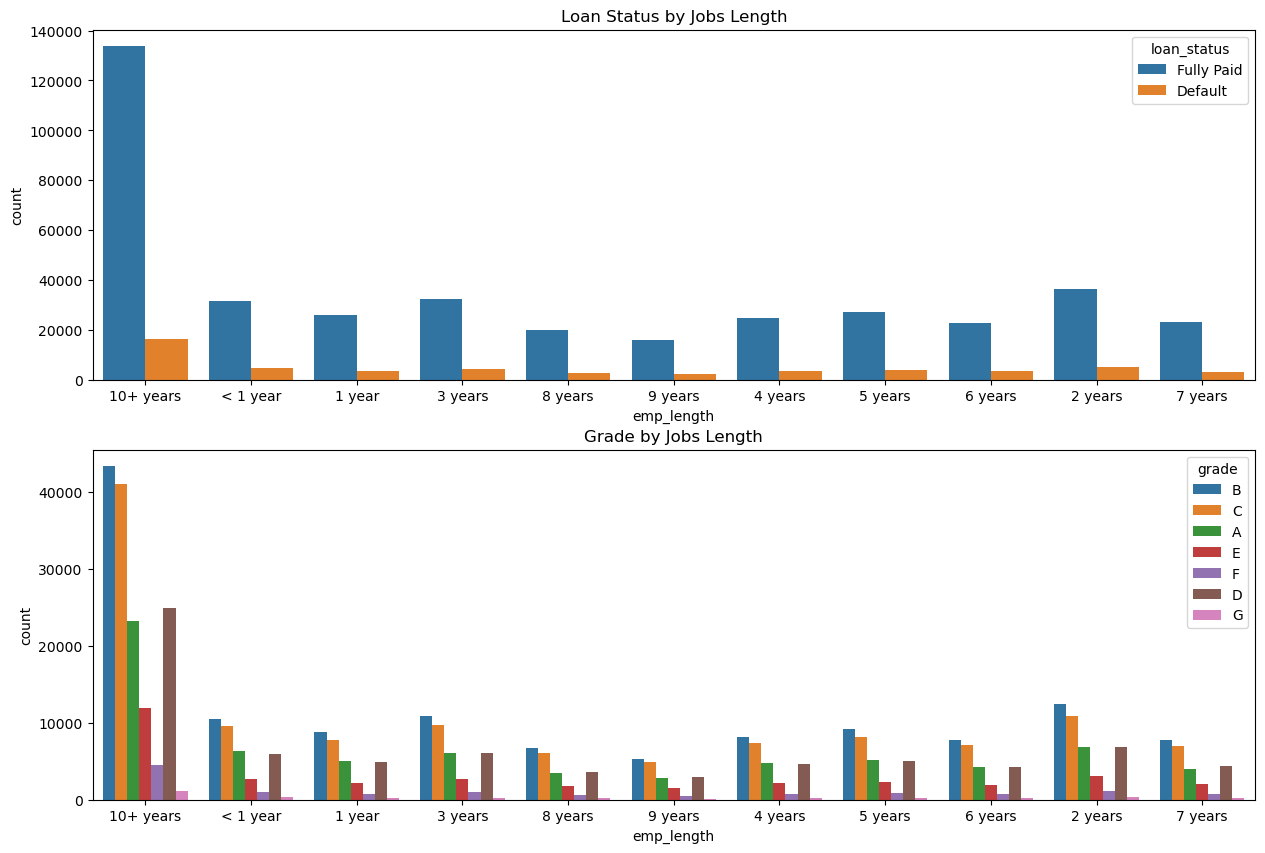

In [1925]:
fig,ax = plt.subplots(figsize=(15,10),nrows=2,ncols=1)

sns.countplot(data=raw_data,x='emp_length',hue='loan_status',ax=ax[0])
sns.countplot(data=raw_data,x='emp_length',hue='grade',ax=ax[1])
ax[0].set_title('Loan Status by Jobs Length')
ax[1].set_title('Grade by Jobs Length')
plt.show()

**Insight** : 5. Loan Status and Grade evenly spread across jobs length

Text(0.5, 1.0, 'Loan Status by Home Ownership')

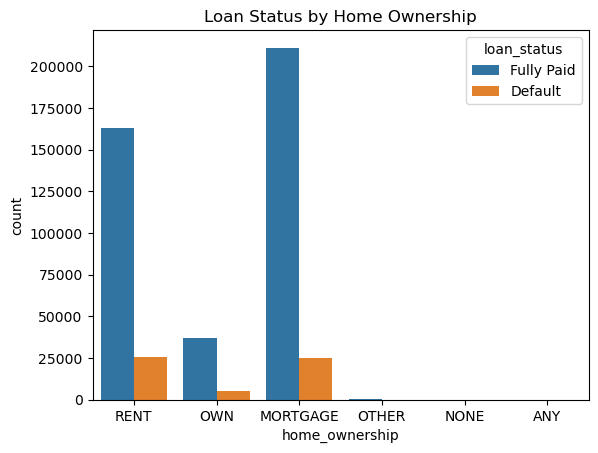

In [1926]:
ax = sns.countplot(data=raw_data,x='home_ownership',hue='loan_status')
ax.set_title('Loan Status by Home Ownership')

**Insight** : 6. Home Ownership doesn't necessarily affect Loan Status

Text(0.5, 1.0, 'Loan Status by Interest Rate')

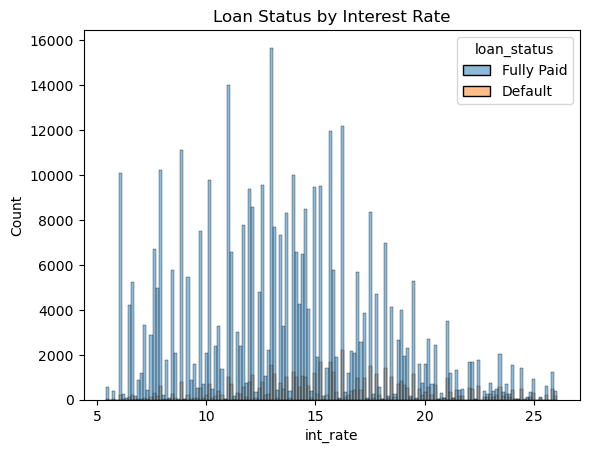

In [1927]:
ax = sns.histplot(data=raw_data,x='int_rate',hue='loan_status')
ax.set_title('Loan Status by Interest Rate')

**Insight** : 7. Higher Interest Rate means higher probability of Loan Default

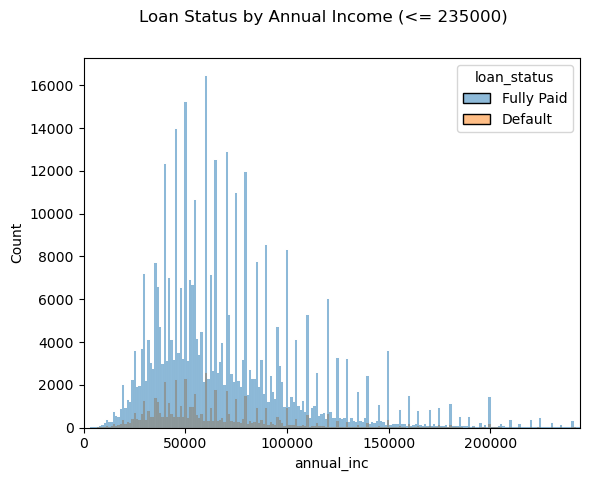

In [1928]:
q3 = raw_data['annual_inc'].quantile(0.99)

sns.histplot(data=raw_data,x='annual_inc',hue='loan_status')
plt.xlim(0,q3)
plt.suptitle('Loan Status by Annual Income (<= 235000)')
plt.show()

**Insight** : 8. Home Ownership doesn't necessarily affect Loan Status

**Insight** : 9. Only 1% of borrowers that have annual income more than 235000

C:\Users\Muhammad Ichsan\AppData\Local\Temp\ipykernel_4360\2587762150.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  raw_data['issue_d'] = pd.to_datetime(raw_data['issue_d'])


Text(0.5, 1.0, 'Loan Status by Loan Issue Date')

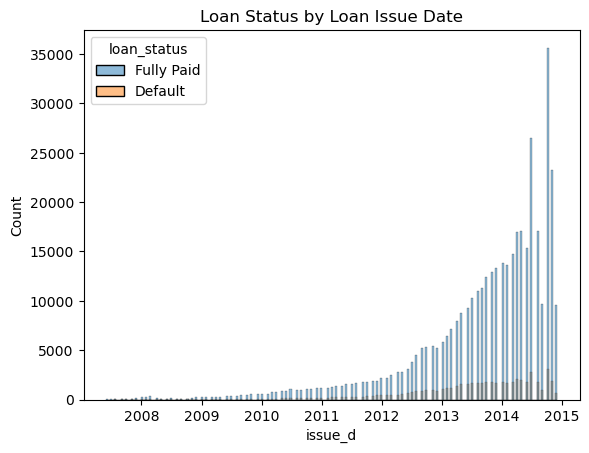

In [1929]:
raw_data['issue_d'] = raw_data['issue_d'].str.replace('-','-20')
raw_data['issue_d'] = pd.to_datetime(raw_data['issue_d'])

ax = sns.histplot(data=raw_data,x='issue_d',hue='loan_status')
ax.set_title('Loan Status by Loan Issue Date')

**Insight** : 10. Issued Date doesn't necessarily affect Loan Status

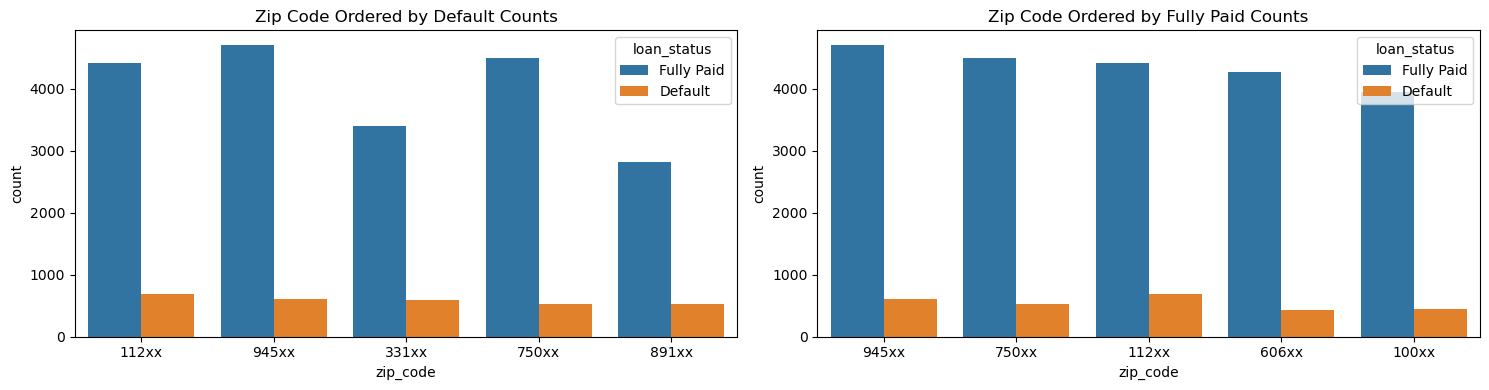

In [1930]:
default_counts = raw_data[raw_data["loan_status"] == "Default"]["zip_code"].value_counts().iloc[:5].index
full_counts = raw_data[raw_data["loan_status"] == "Fully Paid"]["zip_code"].value_counts().iloc[:5].index

fig, ax = plt.subplots(figsize=(15,4),nrows=1,ncols=2)

sns.countplot(data=raw_data,x='zip_code',hue='loan_status',order=default_counts,ax=ax[0])
sns.countplot(data=raw_data,x='zip_code',hue='loan_status',order=full_counts,ax=ax[1])
ax[0].set_title('Zip Code Ordered by Default Counts')
ax[1].set_title('Zip Code Ordered by Fully Paid Counts')
plt.tight_layout()

**Insight** : 11. Zip Code with Highest Default & Fully Paid Counts

Text(0.5, 1.0, 'Loan Status by 10 Most Common Address State ')

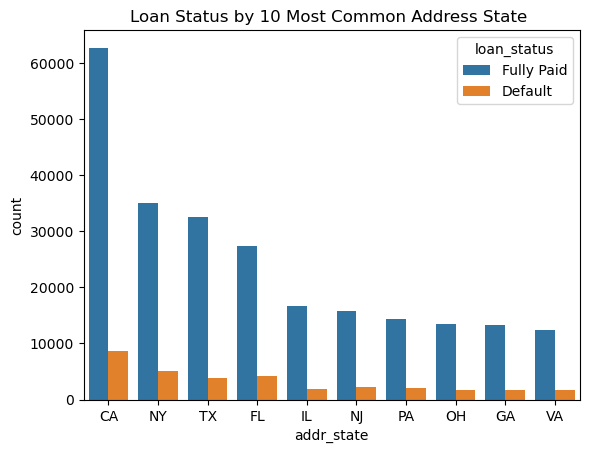

In [1931]:
ax = sns.countplot(data=raw_data,x='addr_state',hue='loan_status',order=raw_data.addr_state.value_counts().iloc[:10].index)
ax.set_title('Loan Status by 10 Most Common Address State ')

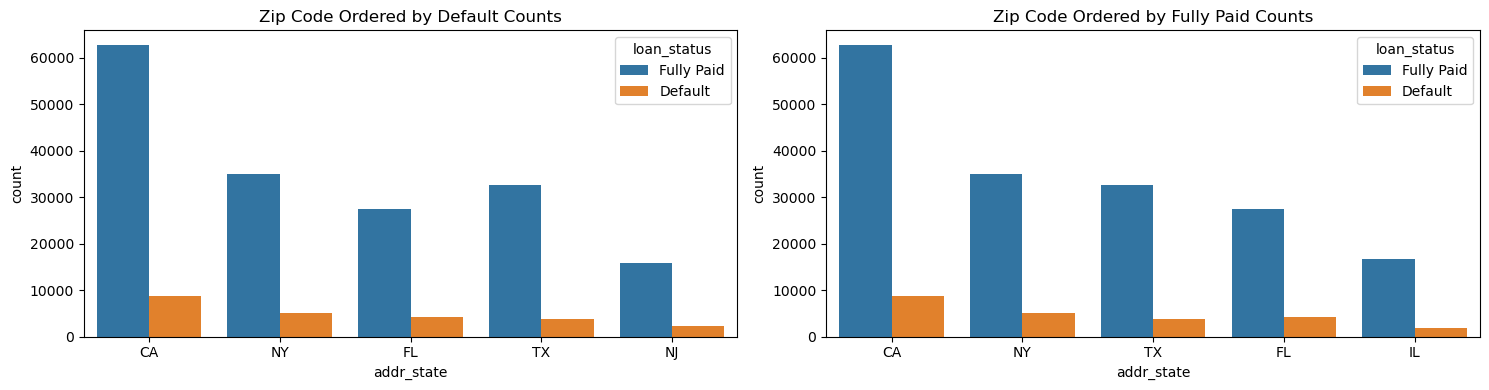

In [1932]:
default_counts = raw_data[raw_data["loan_status"] == "Default"]["addr_state"].value_counts().iloc[:5].index
full_counts = raw_data[raw_data["loan_status"] == "Fully Paid"]["addr_state"].value_counts().iloc[:5].index

fig, ax = plt.subplots(figsize=(15,4),nrows=1,ncols=2)

sns.countplot(data=raw_data,x='addr_state',hue='loan_status',order=default_counts,ax=ax[0])
sns.countplot(data=raw_data,x='addr_state',hue='loan_status',order=full_counts,ax=ax[1])
ax[0].set_title('Zip Code Ordered by Default Counts')
ax[1].set_title('Zip Code Ordered by Fully Paid Counts')
plt.tight_layout()

**Insight** : 12. No anomaly on certain Address which shows High Default

Text(0.5, 1.0, 'Loan Status by DTI')

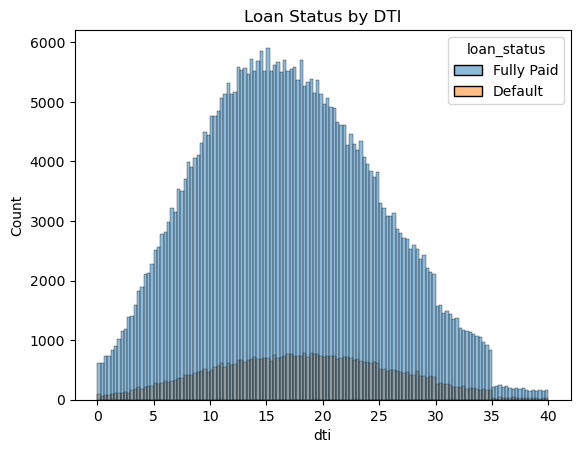

In [1933]:
ax = sns.histplot(data=raw_data,x='dti',hue='loan_status')
ax.set_title('Loan Status by DTI')

**Insight** : 13. Higher DTI shows higher Ratio of Default

Text(0.5, 1.0, 'Loan Status by Number of Violations since Last Credit Activity')

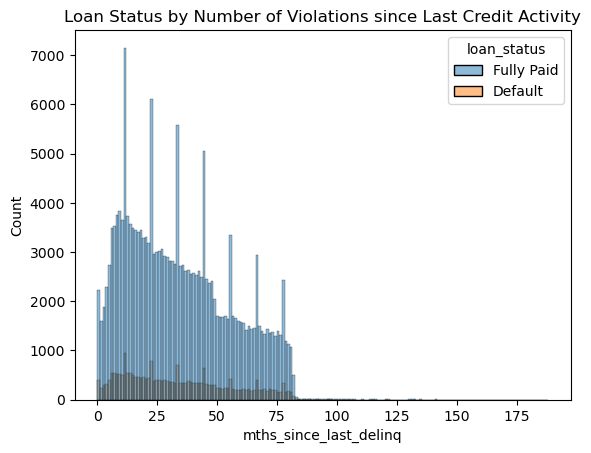

In [1934]:
ax = sns.histplot(data=raw_data,x='mths_since_last_delinq',hue='loan_status')
ax.set_title('Loan Status by Number of Violations since Last Credit Activity')

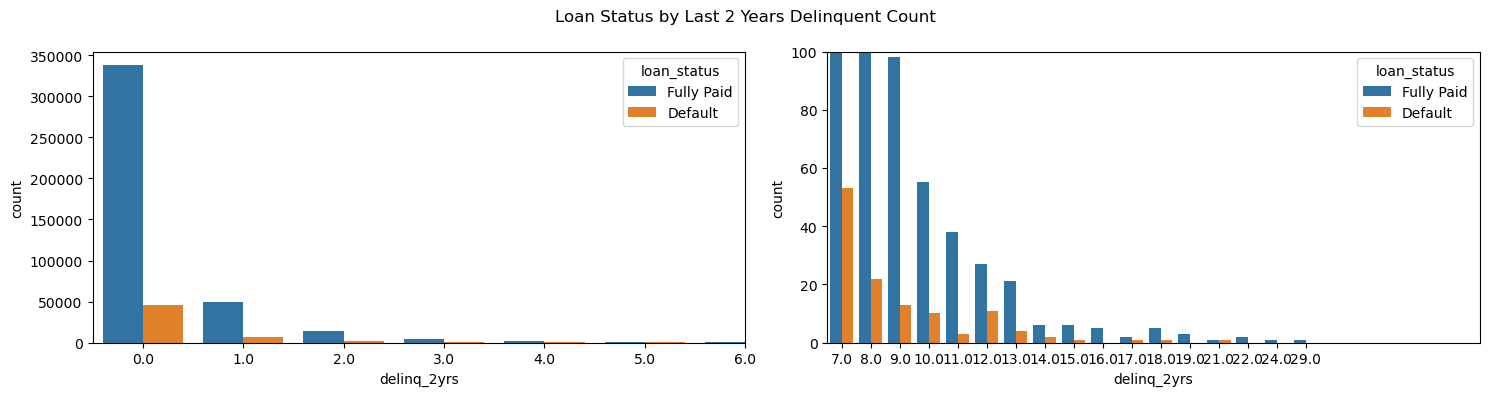

In [1935]:
max_data = raw_data['delinq_2yrs'].max()

fig, ax = plt.subplots(figsize=(15,4),nrows=1,ncols=2)

sns.countplot(data=raw_data,x='delinq_2yrs',hue='loan_status',ax=ax[0])
sns.countplot(data=raw_data,x='delinq_2yrs',hue='loan_status',ax=ax[1])
ax[0].set_xlim(-0.5,6)
ax[1].set_xlim(6.5,max_data)
ax[1].set_ylim(0,100)
plt.suptitle('Loan Status by Last 2 Years Delinquent Count')
plt.tight_layout()

C:\Users\Muhammad Ichsan\AppData\Local\Temp\ipykernel_4360\652743315.py:5: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax[0].set_xlim(0,0)


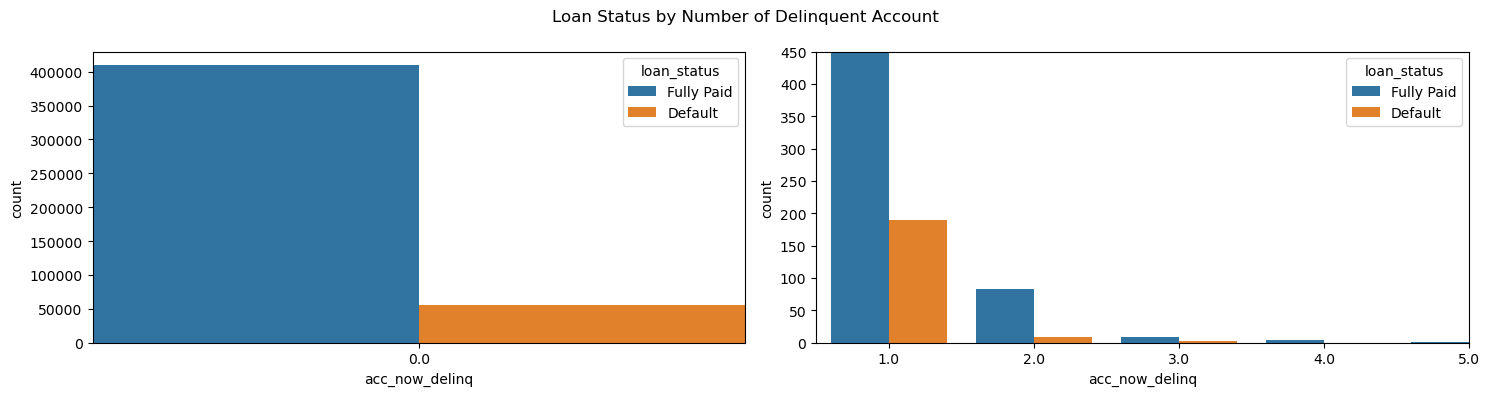

In [1936]:
fig, ax = plt.subplots(figsize=(15,4),nrows=1,ncols=2)

sns.countplot(data=raw_data,x='acc_now_delinq',hue='loan_status',ax=ax[0])
sns.countplot(data=raw_data,x='acc_now_delinq',hue='loan_status',ax=ax[1])
ax[0].set_xlim(0,0)
ax[1].set_xlim(0.5,5)
ax[1].set_ylim(0,450)
plt.suptitle('Loan Status by Number of Delinquent Account')
plt.tight_layout()

**Insight** : 14. Delinq number fairly affects Loan Status to Default

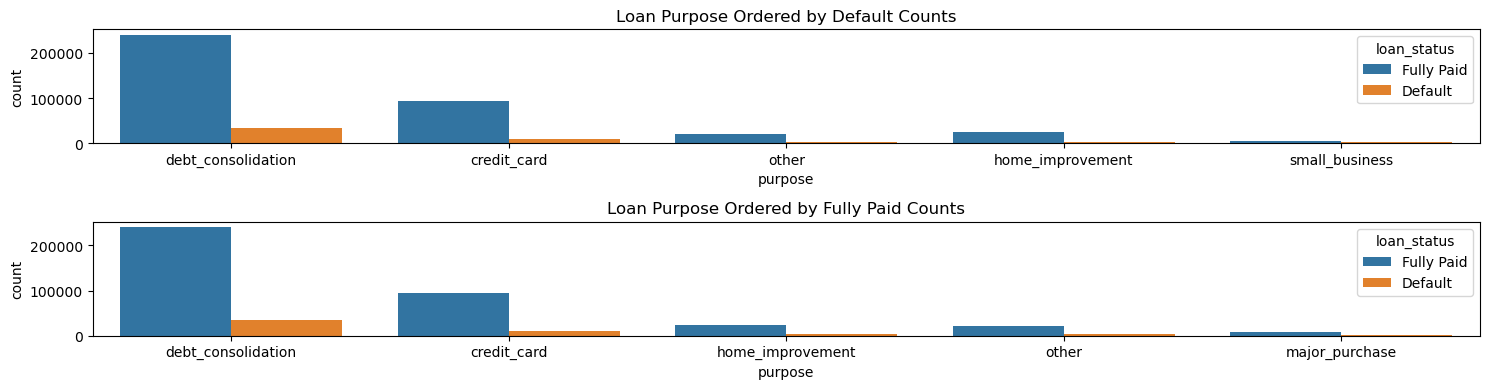

In [1937]:
default_counts = raw_data[raw_data["loan_status"] == "Default"]["purpose"].value_counts().iloc[:5].index
full_counts = raw_data[raw_data["loan_status"] == "Fully Paid"]["purpose"].value_counts().iloc[:5].index

fig, ax = plt.subplots(figsize=(15,4),nrows=2,ncols=1)

sns.countplot(data=raw_data,x='purpose',hue='loan_status',order=default_counts,ax=ax[0])
sns.countplot(data=raw_data,x='purpose',hue='loan_status',order=full_counts,ax=ax[1])
ax[0].set_title('Loan Purpose Ordered by Default Counts')
ax[1].set_title('Loan Purpose Ordered by Fully Paid Counts')
plt.tight_layout()

**Insight** : 15. Loan Purpose with Highest Default & Fully Paid Counts

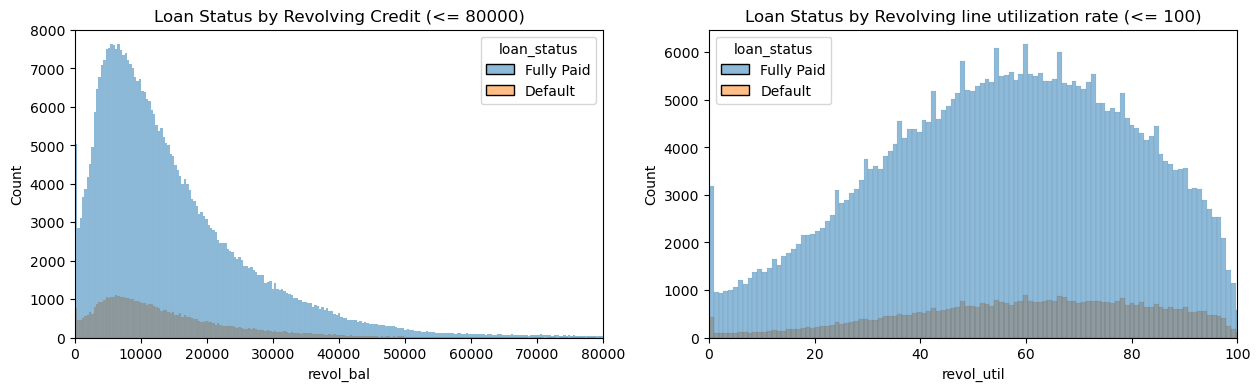

In [1938]:
fig,ax = plt.subplots(figsize=(15,4),nrows=1,ncols=2)
sns.histplot(data=raw_data,x='revol_bal',hue='loan_status',ax=ax[0])
sns.histplot(data=raw_data,x='revol_util',hue='loan_status',ax=ax[1])
ax[0].set_title('Loan Status by Revolving Credit (<= 80000)')
q3 = raw_data['revol_bal'].quantile(0.99)
ax[0].set_xlim(0,80000)
q3 = raw_data['revol_util'].quantile(0.99)
ax[1].set_xlim(0,100)
ax[1].set_title('Loan Status by Revolving line utilization rate (<= 100)')
plt.show()

Text(0.5, 1.0, 'Loan Status by Total Account')

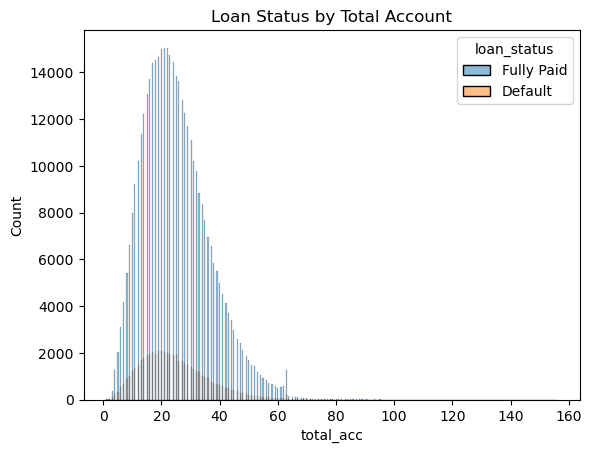

In [1939]:
ax = sns.histplot(data=raw_data,x='total_acc',hue='loan_status')
ax.set_title('Loan Status by Total Account')

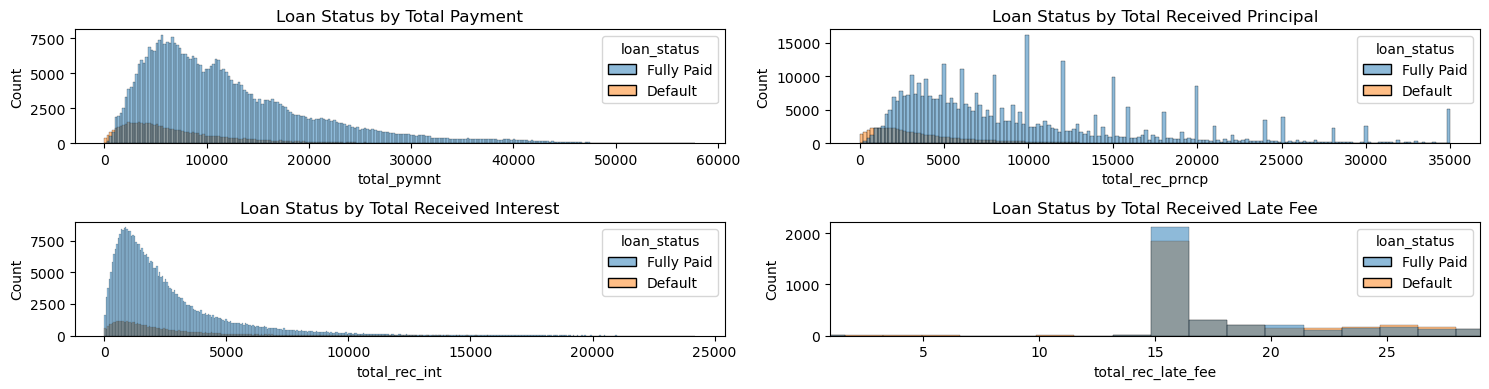

In [1940]:
edited_df = raw_data[raw_data['total_rec_late_fee'] > 0]

fig, ax = plt.subplots(figsize=(15,4),nrows=2,ncols=2)
sns.histplot(data=raw_data,x='total_pymnt',hue='loan_status',ax=ax[0][0])
sns.histplot(data=raw_data,x='total_rec_prncp',hue='loan_status',ax=ax[0][1])
sns.histplot(data=raw_data,x='total_rec_int',hue='loan_status',ax=ax[1][0])
sns.histplot(data=edited_df,x='total_rec_late_fee',hue='loan_status',ax=ax[1][1])
ax[0][0].set_title('Loan Status by Total Payment')
ax[0][1].set_title('Loan Status by Total Received Principal')
ax[1][0].set_title('Loan Status by Total Received Interest')
ax[1][1].set_title('Loan Status by Total Received Late Fee')
ax[1][1].set_xlim(1,max_data)
plt.tight_layout()

Text(0.5, 1.0, 'Loan Status by Months Since Derog')

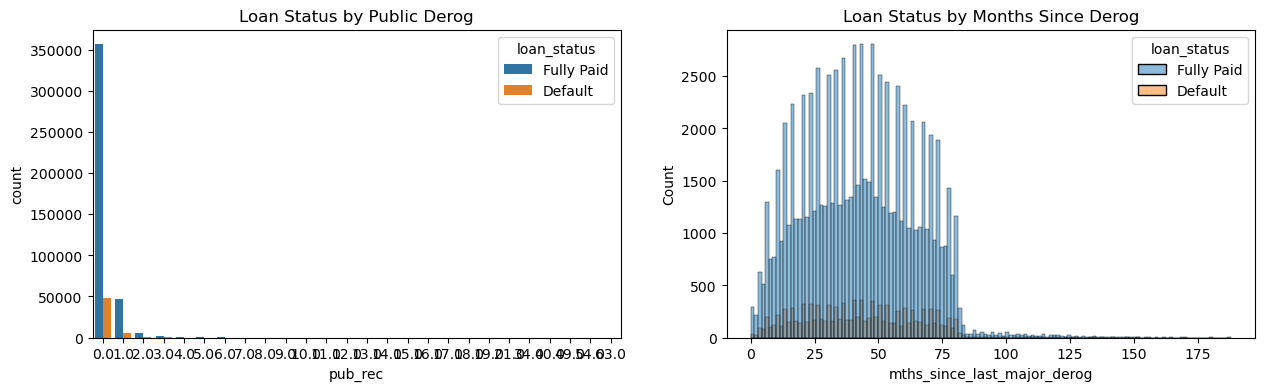

In [1941]:
fig, ax = plt.subplots(figsize=(15,4),nrows=1,ncols=2)
sns.countplot(data=raw_data,x='pub_rec',hue='loan_status',ax=ax[0])
sns.histplot(data=raw_data,x='mths_since_last_major_derog',hue='loan_status',ax=ax[1])
ax[0].set_title('Loan Status by Public Derog')
ax[1].set_title('Loan Status by Months Since Derog')

Text(0.5, 1.0, 'Loan Status by Application Type')

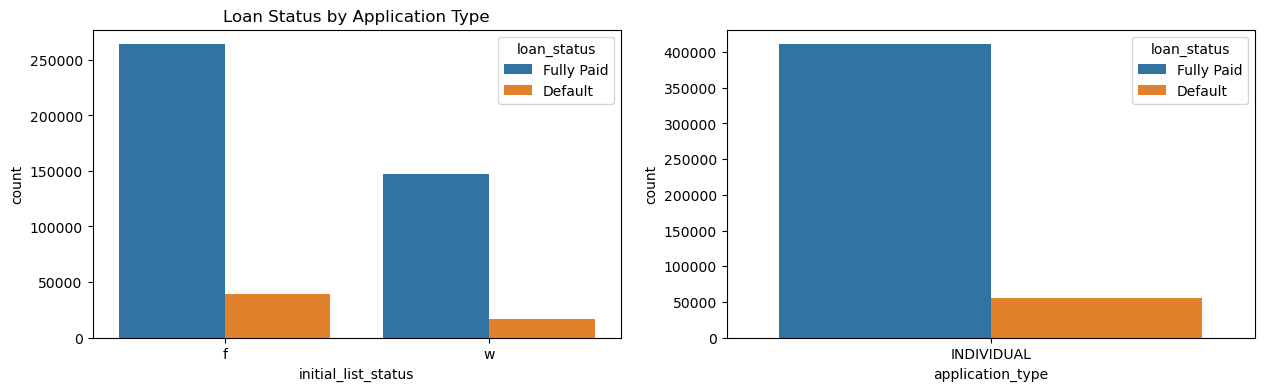

In [1942]:
fig, ax = plt.subplots(figsize=(15,4),nrows=1,ncols=2)
sns.countplot(data=raw_data,x='initial_list_status',hue='loan_status',ax=ax[0])
sns.countplot(data=raw_data,x='application_type',hue='loan_status',ax=ax[1])
ax[0].set_title('Loan Status by Initial List Status')
ax[0].set_title('Loan Status by Application Type')

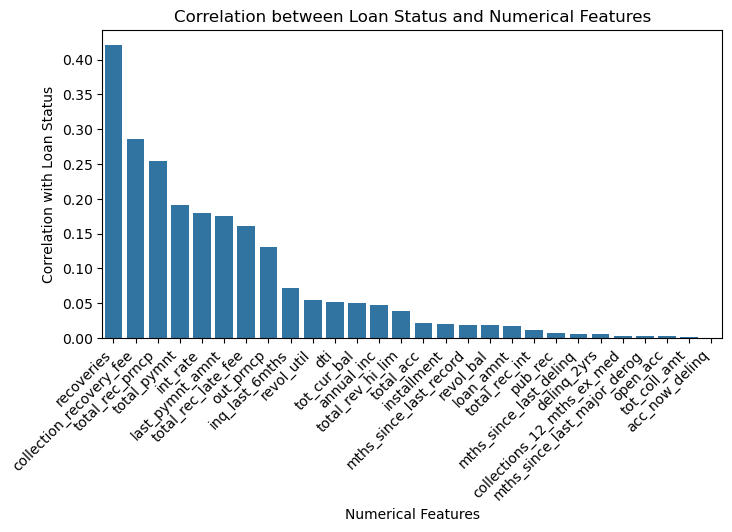

In [1943]:
raw_data['loan_status'] = raw_data['loan_status'].map({'Fully Paid': 0, 'Default': 1})

numerical_df = raw_data.select_dtypes(include=['number'])
correlations = numerical_df.corr()['loan_status'].drop('loan_status')
correlations = correlations.abs().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x=correlations.index, y=correlations.values)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Correlation with Loan Status')
plt.xlabel('Numerical Features')
plt.title('Correlation between Loan Status and Numerical Features')
plt.show()

**Insight** = Numerical features that correlate with Loan Status

## Value Counts

- *function* **pandas.Series.value_counts()** = Frequency of values of chosen feature's values
- *purpose* = See values list of chosen feature and how many are there for every values
- *optional* **use SUBSTRING_CHECKER**

In [1944]:
#SUBSTRING_CHECKER = raw_data[FEATURE_NAME].str.extract('(lendingclub)', expand=False)

raw_data['tot_coll_amt'].value_counts()
#raw_data[FEATURE_NAME].str.extract('(lendingclub)', expand=False).value_counts()

tot_coll_amt
0.0        346259
50.0          837
100.0         650
75.0          515
200.0         309
            ...  
12427.0         1
10306.0         1
12203.0         1
6500.0          1
3712.0          1
Name: count, Length: 6321, dtype: int64

- *function* **pandas.Series.value_counts().size** = Number of chosen feature unique values
- *purpose* = Useful to consider using One-Hot Encoding or not

In [1945]:
raw_data['addr_state'].value_counts().size

50

- *function* **values_count_spesific_key** = Value count for spesific value of chosen feature
    - *parameter* **dataframe** = Chosen dataframe
    - *parameter* **feature** = Chosen feature
    - *parameter* **key** = Chosen value
- *purpose* = See spesific value count

In [1946]:
def values_count_spesific_key(dataframe,feature,key):
    print(dataframe[feature].value_counts().get(key,0))

values_count_spesific_key(raw_data,'addr_state',0)

71450


C:\Users\Muhammad Ichsan\AppData\Local\Temp\ipykernel_4360\4120000532.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(dataframe[feature].value_counts().get(key,0))


# **Data Preparation**

## Column Handling
- Clean data values to make it usable and easier to process
- Drop unimportant features (id, etc.)

Change Term to int

In [1947]:
raw_data['term'] = raw_data['term'].str.replace(' months','')
raw_data['term'] = raw_data['term'].astype('int64')

Map Emp Length

In [1948]:
raw_data['emp_length'] = raw_data['emp_length'].replace({
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10})

C:\Users\Muhammad Ichsan\AppData\Local\Temp\ipykernel_4360\611739441.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  raw_data['emp_length'] = raw_data['emp_length'].replace({


- *function* **one_hot_feature** = Do One-Hot Feature
- *parameter* = **dataframe** = Chosen dataframe
- *parameter* **feature** = Chosen feature
- *purpose* = Change Categorical features to Numerical

In [1949]:
def one_hot_feature(dataframe,feature):
    one_hot = pd.get_dummies(dataframe[feature])
    dataframe = pd.concat([dataframe,one_hot],axis=1)
    return dataframe

In [1950]:
raw_data = one_hot_feature(raw_data,'home_ownership')
raw_data = one_hot_feature(raw_data,'verification_status')
raw_data = one_hot_feature(raw_data,'pymnt_plan')
raw_data = one_hot_feature(raw_data,'purpose')
raw_data = one_hot_feature(raw_data,'initial_list_status')
raw_data = one_hot_feature(raw_data,'application_type')
raw_data = one_hot_feature(raw_data,'sub_grade')

In [1951]:
raw_data = raw_data.drop(['pymnt_plan','n'],axis=1)
raw_data = raw_data.rename(columns={'y': 'pymnt_plan'})

raw_data = raw_data.drop(['initial_list_status','w'],axis=1)
raw_data = raw_data.rename(columns={'f': 'initial_list_status'})

raw_data = raw_data.drop(['application_type'],axis=1)
raw_data = raw_data.rename(columns={'INDIVIDUAL': 'application_type'})

Drop unimportant features

In [1952]:
raw_data = raw_data.drop(['home_ownership','verification_status','url','desc','purpose','title','sub_grade'],axis=1)

Change Datatype

In [1953]:
raw_data['last_pymnt_d'] = raw_data['last_pymnt_d'].str.replace('-','-20')
raw_data['last_pymnt_d'] = pd.to_datetime(raw_data['last_pymnt_d'])

raw_data['next_pymnt_d'] = raw_data['next_pymnt_d'].str.replace('-','-20')
raw_data['next_pymnt_d'] = pd.to_datetime(raw_data['next_pymnt_d'])

raw_data['last_credit_pull_d'] = raw_data['last_credit_pull_d'].str.replace('-','-20')
raw_data['last_credit_pull_d'] = pd.to_datetime(raw_data['last_credit_pull_d'])

raw_data['zip_code'] = raw_data.zip_code.apply(lambda x: int(x[:3]))
raw_data['earliest_cr_line'] = pd.to_datetime(raw_data['earliest_cr_line'], format='%b-%y')
raw_data['earliest_cr_line'] = raw_data['earliest_cr_line'].dt.year

state_counts = raw_data['addr_state'].value_counts()
raw_data['addr_state'] = raw_data['addr_state'].map(state_counts)

C:\Users\Muhammad Ichsan\AppData\Local\Temp\ipykernel_4360\54331684.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  raw_data['last_pymnt_d'] = pd.to_datetime(raw_data['last_pymnt_d'])
C:\Users\Muhammad Ichsan\AppData\Local\Temp\ipykernel_4360\54331684.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  raw_data['next_pymnt_d'] = pd.to_datetime(raw_data['next_pymnt_d'])
C:\Users\Muhammad Ichsan\AppData\Local\Temp\ipykernel_4360\54331684.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  raw_data['last_credit_pull_d'] = pd.to_datetime(raw_data['last_credit_pull_d'])


## Row Handling 

### Duplication Data Check

In [1954]:
raw_data.duplicated().sum()

np.int64(0)

## Data Imputation

- *function* **null_values_count** = Number of null values in chosen feature
- *parameter* **feature** = Chosen feature
- *purpose* = See values list of chosen feature and how many are there for every values

In [1955]:
def null_values_count(feature):
    print(raw_data[raw_data[feature].isna()].shape[0])

null_values_count('addr_state')

0


- *function* **isnull().sum()** = Number of null values accross the dataset
- *purpose* = Display features with null values

In [1956]:
missing_values = raw_data.isnull().sum()
print(missing_values[missing_values > 0])

emp_title                       27588
emp_length                      21008
annual_inc                          4
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_last_delinq         250351
mths_since_last_record         403647
open_acc                           29
pub_rec                            29
revol_util                        340
total_acc                          29
last_pymnt_d                      376
next_pymnt_d                   227214
last_credit_pull_d                 42
collections_12_mths_ex_med        145
mths_since_last_major_derog    367311
acc_now_delinq                     29
tot_coll_amt                    70276
tot_cur_bal                     70276
total_rev_hi_lim                70276
dtype: int64


In [1957]:
raw_data['emp_title'].info()
raw_data['next_pymnt_d'].info()
raw_data['mths_since_last_record'].info()
raw_data['mths_since_last_major_derog'].info()
raw_data['mths_since_last_delinq'].info()
raw_data['tot_coll_amt'].info()
raw_data['tot_cur_bal'].info()
raw_data['total_rev_hi_lim'].info()
raw_data['last_pymnt_d'].info()

<class 'pandas.core.series.Series'>
Index: 466285 entries, 0 to 466284
Series name: emp_title
Non-Null Count   Dtype 
--------------   ----- 
438697 non-null  object
dtypes: object(1)
memory usage: 7.1+ MB
<class 'pandas.core.series.Series'>
Index: 466285 entries, 0 to 466284
Series name: next_pymnt_d
Non-Null Count   Dtype         
--------------   -----         
239071 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.1 MB
<class 'pandas.core.series.Series'>
Index: 466285 entries, 0 to 466284
Series name: mths_since_last_record
Non-Null Count  Dtype  
--------------  -----  
62638 non-null  float64
dtypes: float64(1)
memory usage: 7.1 MB
<class 'pandas.core.series.Series'>
Index: 466285 entries, 0 to 466284
Series name: mths_since_last_major_derog
Non-Null Count  Dtype  
--------------  -----  
98974 non-null  float64
dtypes: float64(1)
memory usage: 7.1 MB
<class 'pandas.core.series.Series'>
Index: 466285 entries, 0 to 466284
Series name: mths_since_last_delinq
Non-

In [1958]:
raw_data['emp_title'].value_counts()
raw_data['next_pymnt_d'].value_counts()
raw_data['mths_since_last_record'].value_counts()
raw_data['mths_since_last_major_derog'].value_counts()
raw_data['emp_length'].value_counts()
raw_data['earliest_cr_line'].value_counts()
raw_data['mths_since_last_delinq'].value_counts()
raw_data['tot_coll_amt'].value_counts()
raw_data['tot_cur_bal'].value_counts()
raw_data['total_rev_hi_lim'].value_counts()
raw_data['last_pymnt_d'].value_counts()

last_pymnt_d
2016-01-01    179620
2015-12-01     62000
2015-07-01     11703
2015-10-01     11248
2015-09-01     10204
               ...  
2008-06-01        20
2008-03-01        18
2008-01-01        11
2008-02-01         8
2007-12-01         2
Name: count, Length: 98, dtype: int64

In [1959]:
raw_data = raw_data.drop('emp_title',axis=1)
raw_data = raw_data.drop('next_pymnt_d',axis=1)
raw_data = raw_data.drop('mths_since_last_record',axis=1)
raw_data['mths_since_last_major_derog'][raw_data["mths_since_last_major_derog"] == 0] = 1
raw_data['mths_since_last_major_derog'] = raw_data['mths_since_last_major_derog'].fillna(0)
raw_data = raw_data.dropna(subset=['emp_length','earliest_cr_line','revol_util','collections_12_mths_ex_med'])
raw_data['mths_since_last_delinq'][raw_data["mths_since_last_delinq"] == 0] = 1
raw_data['mths_since_last_delinq'] = raw_data['mths_since_last_delinq'].fillna(0)
raw_data['tot_coll_amt'] = raw_data['tot_coll_amt'].fillna(raw_data['tot_coll_amt'].median())
raw_data['tot_cur_bal'] = raw_data['tot_cur_bal'].fillna(raw_data['tot_cur_bal'].mean())
raw_data['total_rev_hi_lim'] = raw_data['total_rev_hi_lim'].fillna(raw_data['total_rev_hi_lim'].median())
raw_data = raw_data.drop('last_pymnt_d',axis=1)
raw_data = raw_data.drop('last_credit_pull_d',axis=1)
raw_data = raw_data.drop('grade',axis=1)
raw_data = raw_data.drop('issue_d',axis=1)

C:\Users\Muhammad Ichsan\AppData\Local\Temp\ipykernel_4360\3641591013.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  raw_data['mths_since_last_major_derog'][raw_data["mths_since_last_major_derog"] == 0] = 1
C:\Users\Muhammad Ichsan\AppD

## Train Test Split

In [1960]:
raw_data.shape

(444836, 94)

In [1961]:
train, test = train_test_split(raw_data,test_size=0.2,random_state=42)

In [1962]:
print(train.shape)
print(test.shape)

(355868, 94)
(88968, 94)


## Removing Outlier

In [1963]:
q1 = train['annual_inc'].quantile(0.25)
q3 = train['annual_inc'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

print(upper_bound)

156750.0


<Axes: xlabel='tot_cur_bal'>

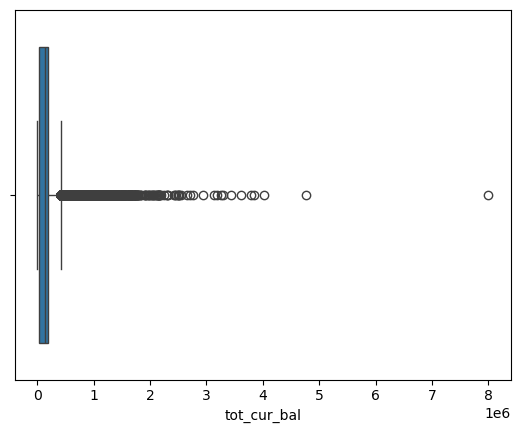

In [1964]:
sns.boxplot(data=train,x='tot_cur_bal')

In [1965]:
train['dti'].value_counts()

dti
14.40    312
19.20    286
16.80    278
12.00    275
18.00    275
        ... 
39.14      1
35.35      1
37.24      1
38.95      1
39.71      1
Name: count, Length: 3994, dtype: int64

In [1966]:
train = train[train['annual_inc'] <= upper_bound]

q1 = train['dti'].quantile(0.25)
q3 = train['dti'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
train = train[train['dti'] <= upper_bound]

q1 = train['open_acc'].quantile(0.25)
q3 = train['open_acc'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr

train = train[train['open_acc'] <= upper_bound]

q1 = train['revol_bal'].quantile(0.25)
q3 = train['revol_bal'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr

train = train[train['revol_bal'] <= upper_bound]

q1 = train['revol_util'].quantile(0.25)
q3 = train['revol_util'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr

train = train[train['revol_util'] <= upper_bound]

q1 = train['total_acc'].quantile(0.25)
q3 = train['total_acc'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr

train = train[train['total_acc'] <= upper_bound]

q1 = train['tot_cur_bal'].quantile(0.25)
q3 = train['tot_cur_bal'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr

train = train[train['tot_cur_bal'] <= upper_bound]

In [1967]:
print(train.shape)

(300191, 94)


In [1968]:
X_train, y_train = train.drop('loan_status',axis=1), train['loan_status']
X_test, y_test = test.drop('loan_status',axis=1), test['loan_status']

# **Convert to CSV**

For Training we used **LogReg.py** and **RandForest.py**

In [1969]:
X_train.to_csv('./dataset/X_train.csv',index=False)
y_train.to_csv('./dataset/y_train.csv',index=False)
X_test.to_csv('./dataset/X_test.csv',index=False)
y_test.to_csv('./dataset/y_test.csv',index=False)